## Ch11 데이터 다루기
* 피마인디언 예제 - 2진분류

**피마 인디언 데이터 분석하기**
* 비만은 유전일까?
* 아니면 식습관 조절에 실패한 자신의 탓일까?
* 비만이 유전 및 환경, 모두의 탓이라는 것을 증명하는 좋은 사례가 바로 미국 남서부에 살고 있는 피마 인디언의 사례
* 피마 인디언은 1950년대까지만 해도 비만인 사람이 단 1명도 없는 민족이었음
지금은 전체 부족의 60%가 당뇨, 80%가 비만으로 고통받고 있음
* 이는 생존하기 위해 영양분을 체내에 저장하는 뛰어난 능력을 물려받은 인디언들이 미국의 기름진 패스트푸드 문화를 만나면서 벌어진 일


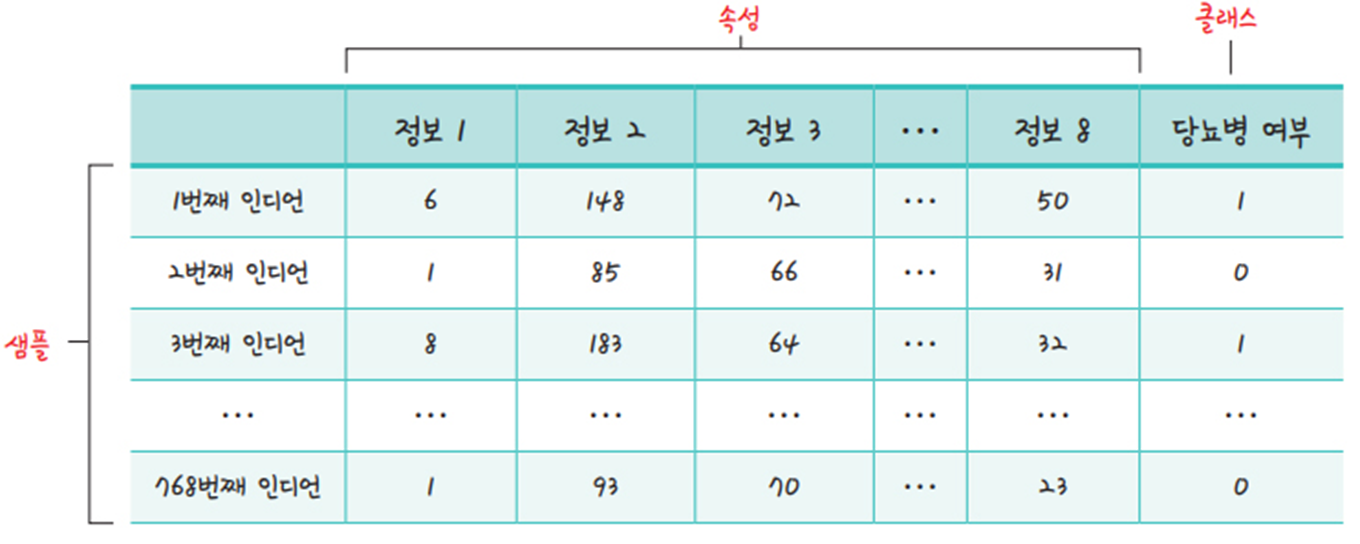

* 데이터 출처 : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

• 샘플 수: 768

• 속성: 8

- 정보 1(pregnant): 과거 임신 횟수
- 정보 2(plasma): 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)
- 정보 3(pressure): 확장기 혈압(mm Hg)
- 정보 4(thickness): 삼두근 피부 주름 두께(mm)
- 정보 5(insulin): 혈청 인슐린(2-hour, mu U/ml)
- 정보 6(BMI): 체질량 지수(BMI, weight in kg/(height in m)2)
- 정보 7(pedigree): 당뇨병 가족력
- 정보 8(age): 나이

• 클래스: 당뇨(1), 당뇨 아님(0)

### 데이터 분석

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


In [47]:
import pandas as pd
## kaggle에서 다운로드 받은 파일 읽어보기
pd.read_csv('../data/diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


* 교재에서 제공하는 파일 읽기

In [48]:
#필요한 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 
df = pd.read_csv('../data/pima-indians-diabetes3.csv')
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
# 정상과 당뇨 환자가 각각 몇 명씩인지 조사해 봅니다.
df["diabetes"].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

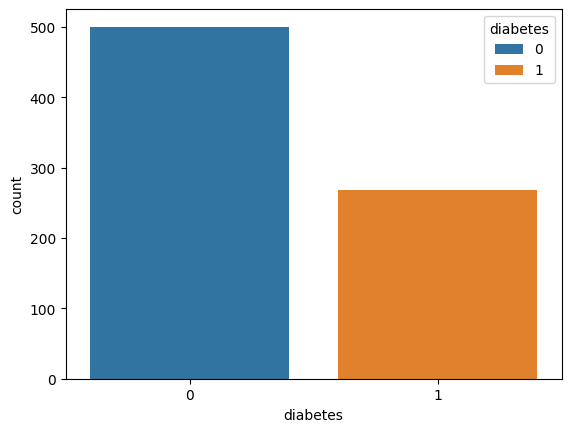

In [26]:
import seaborn as sns
sns.countplot(x='diabetes', data=df, hue='diabetes')

In [27]:
# 각 정보별 특징을 좀 더 자세히 출력합니다.
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
# 각 항목이 어느정도의 상관 관계를 가지고 있는지 알아봅니다. 
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


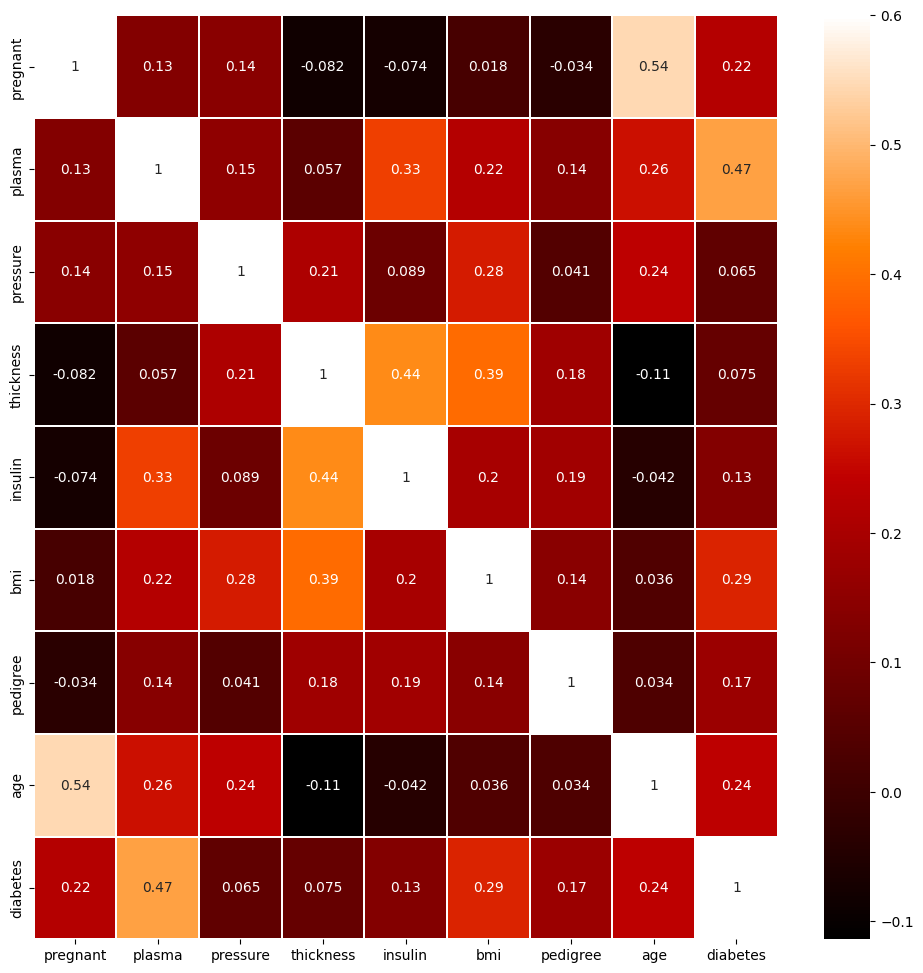

In [29]:
# 데이터 간의 상관 관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax:히트맵의 색상 스케일 상한값을 지정(상관계수0.6이상은 최대색상)
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.6, cmap=colormap, linecolor='white', annot=True)
plt.show()

## 중요한 데이터 추출하기

In [30]:
[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]]

[1       85
 3       89
 5      116
 7      115
 10     110
       ... 
 762     89
 763    101
 764    122
 765    121
 767     93
 Name: plasma, Length: 500, dtype: int64,
 0      148
 2      183
 4      137
 6       78
 8      197
       ... 
 755    128
 757    123
 759    190
 761    170
 766    126
 Name: plasma, Length: 268, dtype: int64]

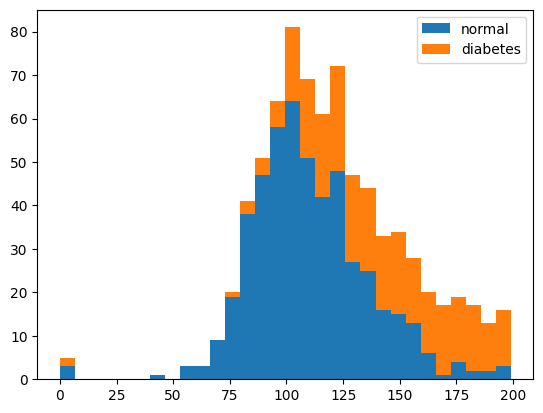

In [31]:
# plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
# 2개의 데이터를 동시에 볼 수 있도록 histtype='barstacked'를 사용합니다.
# x 데이터는 df.plasma[df.diabetes==0]와 df.plasma[df.diabetes==1]로 구성됩니다.
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], 
         bins=30, 
         histtype='barstacked', 
         label=['normal','diabetes'])
plt.legend()

In [32]:
df.bmi[df.diabetes==1]

0      33.6
2      23.3
4      43.1
6      31.0
8      30.5
       ... 
755    36.5
757    36.3
759    35.5
761    44.0
766    30.1
Name: bmi, Length: 268, dtype: float64

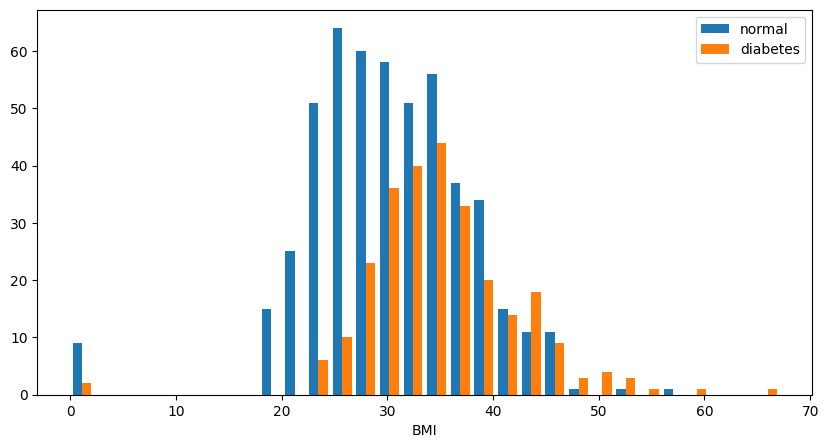

In [33]:
# BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.figure(figsize=(10, 5))
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], 
         bins=30, 
         label=['normal','diabetes'])
plt.xlabel('BMI')
plt.legend()
plt.show()

**중요한 데이터 추출하기**
* BMI가 높아질 경우 당뇨의 발병률도 함께 증가하는 추세를 볼 수 있음
* 이렇게 결과에 미치는 영향이 큰 항목을 발견하는 것이 데이터 전처리 과정 중 하나
* 이 밖에도 데이터에 빠진 값이 있다면 평균이나 중앙값으로 대치하거나, 흐름에서 크게 벗어나는 이상치를 제거하는 과정 등이 데이터 전처리에 포함될 수 있음


## 이진분류 딥러닝 

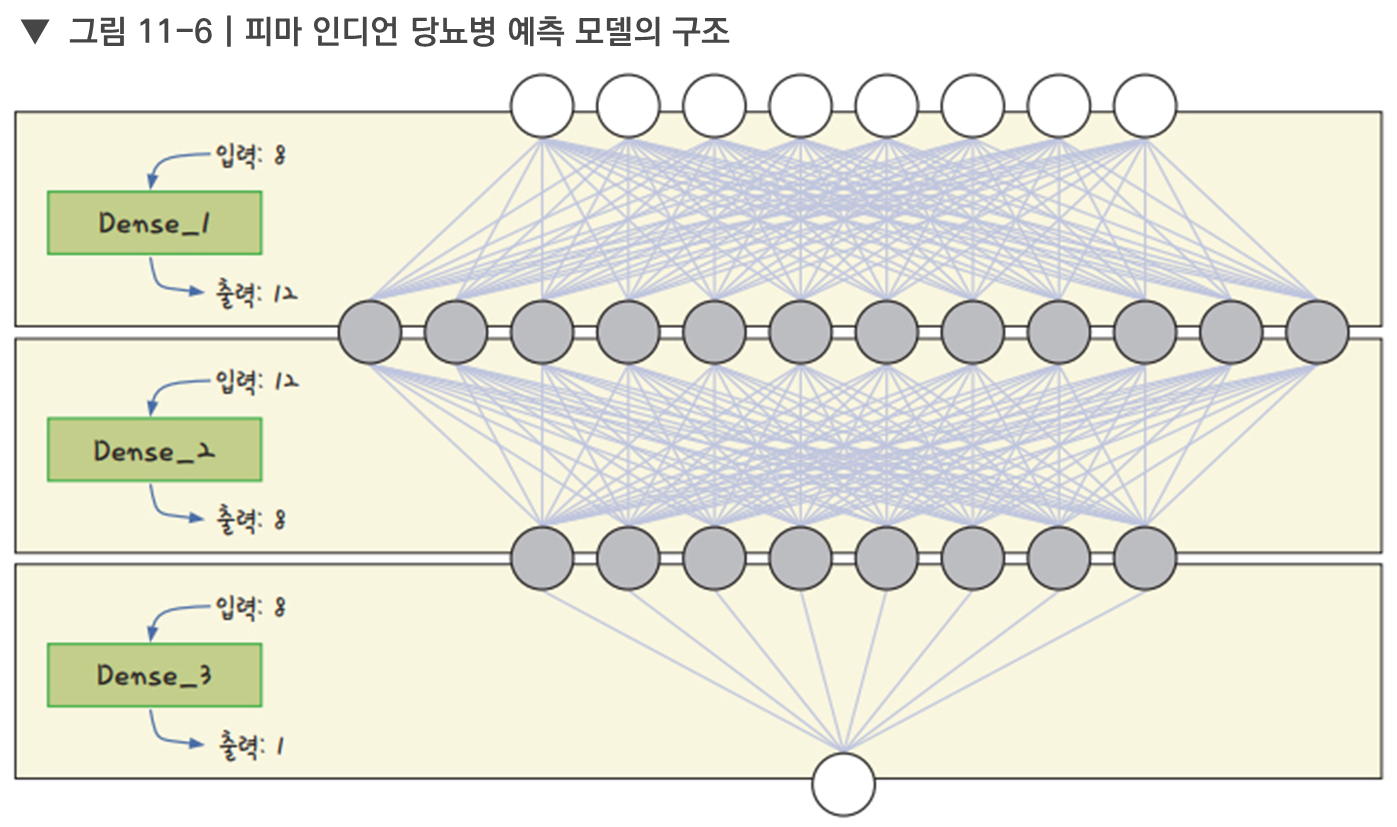

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 
df = pd.read_csv('../data/pima-indians-diabetes3.csv')
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
# 세부 정보를 X로 지정합니다.
X = df.iloc[:, 0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:, 8]
X.shape, y.shape

((768, 8), (768,))

* **`train_test_split`** 
 
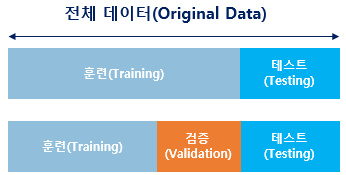

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [45]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1')) # 입력층 -> 은닉층1
model.add(Dense(8, activation='relu', name='Dense_2')) # 은닉층1 -> 은닉층2
model.add(Dense(1, activation='sigmoid', name='Dense_3')) # 은익층2 -> 출력층
model.summary()

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6938 - loss: 0.5710
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6906 - loss: 0.5700
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.5677
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7101 - loss: 0.5604
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.5667
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - loss: 0.5677
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.5631
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.5681
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.5635
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.5611
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 0.5592
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [73]:
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss
0,0.693811,0.571048
1,0.690554,0.570015
2,0.701954,0.567701
3,0.710098,0.560375
4,0.692182,0.566728
...,...,...
95,0.635179,0.562223
96,0.672638,0.533855
97,0.674267,0.534011
98,0.672638,0.531540


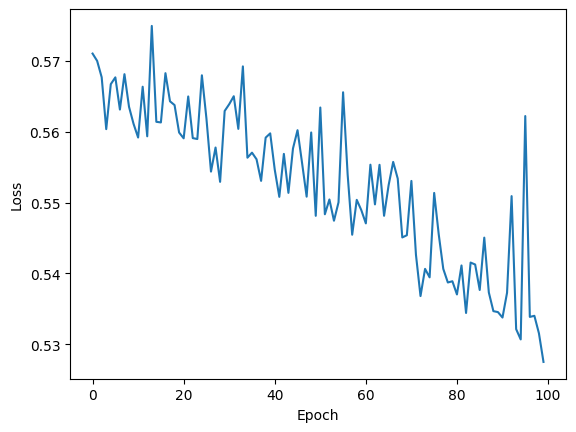

In [74]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
df_history['loss'].plot()   
plt.show()

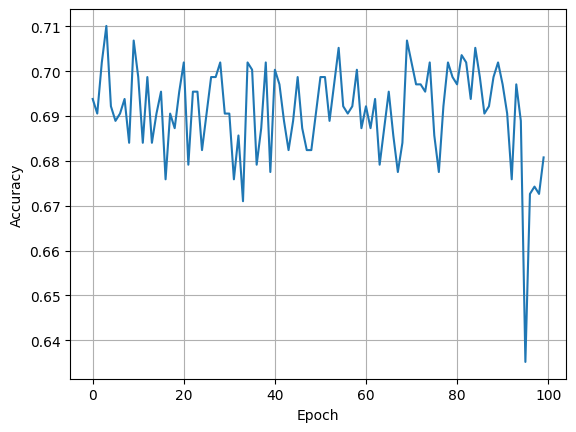

In [75]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
df_history['accuracy'].plot()   
plt.grid()
plt.show()

In [76]:
# 모델 평가하기
scores = model.evaluate(X_test, y_test)
scores   # [loss, accuracy]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6753 - loss: 0.6561  


[0.6561065316200256, 0.6753246784210205]

In [77]:
type(history.history)

dict

## 학습된 모델 검증 

In [78]:
model.evaluate(X_train, y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.5742 


[0.5741868615150452, 0.6677524447441101]

In [79]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6753 - loss: 0.6561


[0.6561065316200256, 0.6753246784210205]

In [80]:
# Test 데이터 10세트로 예측
model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.58019567],
       [0.2975797 ],
       [0.41941336],
       [0.491337  ],
       [0.4992873 ],
       [0.4992873 ],
       [0.4992873 ],
       [0.4992873 ],
       [0.4992873 ],
       [0.4992873 ]], dtype=float32)

In [81]:
## 예측값 (1 또는 0으로 출력)
y_pred = (model.predict(X_test).flatten() > 0.5).astype(int)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [82]:
# 실제 값
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [83]:
## 정확도
(y_pred == y_test).mean()

np.float64(0.6753246753246753)

## 모델 살펴보기

In [70]:
# 3. 모델 구성하기
model_test = Sequential()
model_test.add(Dense(10, input_dim=8, activation='relu'))
model_test.add(Dense(12, activation='relu'))
model_test.add(Dense(1, activation='sigmoid'))

# # 4. 모델 학습과정 설정하기
# model_test.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model_test.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)